# NHL data exploration

Purpose of this notebook is to do some data exploration using real life data from National Hockey League(NHL) and showcase my profiency using Python. Data is gathered by [Moneypuck](https://moneypuck.com/index.html) and downloaded straight from their site. Lets dive in!


In [1]:
#import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)

In [23]:
#import the data

df = pd.read_csv(r"C:\Users\Valtteri Kimmo\Downloads\skaters_23_24.csv")  
   
df.head(10)


,playerId,season,name,...,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8480950,2023,Ilya Lyubushkin,...,1.0,3.0,1.0
1,8480950,2023,Ilya Lyubushkin,...,0.0,0.0,0.0
2,8480950,2023,Ilya Lyubushkin,...,11.0,108.0,8.0
3,8480950,2023,Ilya Lyubushkin,...,0.0,3.0,0.0
4,8480950,2023,Ilya Lyubushkin,...,0.0,0.0,0.0
5,8478438,2023,Tommy Novak,...,0.0,0.0,0.0
6,8478438,2023,Tommy Novak,...,0.0,0.0,0.0
7,8478438,2023,Tommy Novak,...,30.0,27.0,24.0
8,8478438,2023,Tommy Novak,...,0.0,0.0,0.0
9,8478438,2023,Tommy Novak,...,1.0,1.0,1.0


First glance at the data looks fine, columns look to be containing the information I want them to have and values are what I expected. Lets check the dimensions of our dataset.

In [24]:
#Dimension of dataset
df.shape

(4620, 154)

We have dataset with 4620 rows and 154 different columns. There are 5 rows for each player determined by 'situation' column. All columns are cumulative stats from the season 2023-2024 so no individual game stats are available. Lets check the exhaustive list of all the columns we have at hand.

In [25]:
# What columns do I have in the dataset?
print(list(df.columns))

['playerId', 'season', 'name', 'team', 'position', 'situation', 'games_played', 'icetime', 'shifts', 'gameScore', 'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped', 'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone', 'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts', 'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped', 'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes', 'I_F_faceOffsWon', 'I_F_hits', 'I_F_takeaways', 'I_F_giveaways', 'I_F_lowDangerShots', 'I_F_

Quite a list! Moneypuck is doing good job tracking all these stats. From my dataset I will be dropping a few of them that I wont be using on this notebook. I will drop all the corsi and fenwick associated columns as well as all the adjusted columns.

In [26]:
#dropping columns Im not interested in

df = df[['playerId', 'season', 'name', 'team', 'position', 'situation', 'games_played','gameScore',
         'icetime', 'shifts',  'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 
         #'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 
         'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped',
         'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone',
         #'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals',
         'I_F_primaryAssists',
         'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts',
         'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped',
         'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 
         'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes', 'I_F_faceOffsWon', 
         'I_F_hits', 'I_F_takeaways', 'I_F_giveaways', 'I_F_lowDangerShots', 'I_F_mediumDangerShots',
         'I_F_highDangerShots', 'I_F_lowDangerxGoals', 'I_F_mediumDangerxGoals', 'I_F_highDangerxGoals',
         'I_F_lowDangerGoals', 'I_F_mediumDangerGoals', 'I_F_highDangerGoals',
         #'I_F_scoreAdjustedShotsAttempts', 
         'I_F_unblockedShotAttempts', 
         #'I_F_scoreAdjustedUnblockedShotAttempts',
         'I_F_dZoneGiveaways',
         'I_F_xGoalsFromxReboundsOfShots', 'I_F_xGoalsFromActualReboundsOfShots', 'I_F_reboundxGoals', 
         'I_F_xGoals_with_earned_rebounds', 
         #'I_F_xGoals_with_earned_rebounds_scoreAdjusted','I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted',
         'I_F_shifts', 'I_F_oZoneShiftStarts', 
         'I_F_dZoneShiftStarts', 'I_F_neutralZoneShiftStarts', 'I_F_flyShiftStarts', 'I_F_oZoneShiftEnds', 
         'I_F_dZoneShiftEnds', 'I_F_neutralZoneShiftEnds', 'I_F_flyShiftEnds', 'faceoffsWon', 'faceoffsLost','timeOnBench',
         'penalityMinutes', 'penalityMinutesDrawn', 'penaltiesDrawn', 'shotsBlockedByPlayer',
         'OnIce_F_xOnGoal', 'OnIce_F_xGoals',
         #'OnIce_F_flurryAdjustedxGoals', 'OnIce_F_scoreVenueAdjustedxGoals', 
         #'OnIce_F_flurryScoreVenueAdjustedxGoals',
         'OnIce_F_shotsOnGoal', 'OnIce_F_missedShots', 
         'OnIce_F_blockedShotAttempts', 'OnIce_F_shotAttempts', 'OnIce_F_goals', 'OnIce_F_rebounds', 
         'OnIce_F_reboundGoals', 'OnIce_F_lowDangerShots', 'OnIce_F_mediumDangerShots', 'OnIce_F_highDangerShots', 
         'OnIce_F_lowDangerxGoals', 'OnIce_F_mediumDangerxGoals', 'OnIce_F_highDangerxGoals', 'OnIce_F_lowDangerGoals',
         'OnIce_F_mediumDangerGoals', 'OnIce_F_highDangerGoals',
         #'OnIce_F_scoreAdjustedShotsAttempts',
         'OnIce_F_unblockedShotAttempts', #'OnIce_F_scoreAdjustedUnblockedShotAttempts',
         'OnIce_F_xGoalsFromxReboundsOfShots', 'OnIce_F_xGoalsFromActualReboundsOfShots', 'OnIce_F_reboundxGoals',
         'OnIce_F_xGoals_with_earned_rebounds',
         #'OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted', 'OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted',
         'OnIce_A_xOnGoal', 'OnIce_A_xGoals',
         #'OnIce_A_flurryAdjustedxGoals', 'OnIce_A_scoreVenueAdjustedxGoals', 'OnIce_A_flurryScoreVenueAdjustedxGoals',
         'OnIce_A_shotsOnGoal', 'OnIce_A_missedShots', 'OnIce_A_blockedShotAttempts', 'OnIce_A_shotAttempts',
         'OnIce_A_goals', 'OnIce_A_rebounds', 'OnIce_A_reboundGoals', 'OnIce_A_lowDangerShots',
         'OnIce_A_mediumDangerShots', 'OnIce_A_highDangerShots', 'OnIce_A_lowDangerxGoals',
         'OnIce_A_mediumDangerxGoals', 'OnIce_A_highDangerxGoals', 'OnIce_A_lowDangerGoals',
         'OnIce_A_mediumDangerGoals', 'OnIce_A_highDangerGoals',
         #'OnIce_A_scoreAdjustedShotsAttempts',
         'OnIce_A_unblockedShotAttempts',
         #'OnIce_A_scoreAdjustedUnblockedShotAttempts',
         'OnIce_A_xGoalsFromxReboundsOfShots', 'OnIce_A_xGoalsFromActualReboundsOfShots', 'OnIce_A_reboundxGoals',
         'OnIce_A_xGoals_with_earned_rebounds',
         #'OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted','OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted',
         'OffIce_F_xGoals', 'OffIce_A_xGoals',
         'OffIce_F_shotAttempts', 'OffIce_A_shotAttempts', 'xGoalsForAfterShifts', 'xGoalsAgainstAfterShifts',
         #'corsiForAfterShifts', 'corsiAgainstAfterShifts', 'fenwickForAfterShifts', 'fenwickAgainstAfterShifts'
        ]]

Now that I have all the columns I want in my dataset its good practice to check what datatype they are.


In [27]:
#Checking the datatypes of each column

for col, dtype in zip(df.columns, df.dtypes):
    print(f'{col:50} {dtype}')

playerId                                           int64
season                                             int64
name                                               object
team                                               object
position                                           object
situation                                          object
games_played                                       int64
gameScore                                          float64
icetime                                            float64
shifts                                             float64
onIce_xGoalsPercentage                             float64
offIce_xGoalsPercentage                            float64
iceTimeRank                                        float64
I_F_xOnGoal                                        float64
I_F_xGoals                                         float64
I_F_xRebounds                                      float64
I_F_xFreeze                                        float64
I_F_xPl

Most of the columns with number values are float64 and only couple at he top are int64. The columns with non-numeric values come with object datatype which is good atleast.

Now I notice 2 trends here:

1) First 8 columns have the datatype I want them to have(playerId I would prefer as object) 
2) The rest of the columns that don't quantify expected value of something would work better as integer datatypes. Expected value columns have letter x in their name and should stay as float.

Using these rules I will change the datatype

In [28]:
# Changing datatypes
df['playerId'] = df['playerId'].astype(object)
df['season'] = df['season'].astype(object)

for i, col in enumerate(df.columns):
    if i >= 8 and 'x' not in col:
        # Directly assign to the column using the column name
        df[col] = df[col].astype('int64')

for col, dtype in zip(df.columns, df.dtypes):
    print(f'{col:50} {dtype}')

playerId                                           object
season                                             object
name                                               object
team                                               object
position                                           object
situation                                          object
games_played                                       int64
gameScore                                          float64
icetime                                            int64
shifts                                             int64
onIce_xGoalsPercentage                             float64
offIce_xGoalsPercentage                            float64
iceTimeRank                                        int64
I_F_xOnGoal                                        float64
I_F_xGoals                                         float64
I_F_xRebounds                                      float64
I_F_xFreeze                                        float64
I_F_xPlaySt

Datatypes have now been changed. Lets take a look on some of the columns little closely.

In [29]:
#Check the common metrics for columns

print(df.describe())

       games_played    gameScore        icetime  ...  OffIce_A_shotAttempts  \
count   4620.000000  4620.000000    4620.000000  ...            4620.000000   
mean      51.104978    20.044771   20230.578355  ...             864.622944   
std       29.016811    24.884332   29125.786977  ...            1197.198244   
min        1.000000    -9.300000       0.000000  ...               0.000000   
25%       24.750000     1.060000     469.000000  ...              33.000000   
50%       61.000000     9.765000    4402.500000  ...             139.000000   
75%       78.000000    31.157500   33273.000000  ...            1796.750000   
max       83.000000   154.730000  127387.000000  ...            4337.000000   

       xGoalsForAfterShifts  xGoalsAgainstAfterShifts  
count           4620.000000               4620.000000  
mean               0.398054                  0.159528  
std                1.158608                  0.427615  
min                0.000000                  0.000000  
25%     

At first glance there don't seem to be any problems with the datavalues. Count in each column is consistently 4620 which was the number of our rows, telling us we dont have any missing values. There are no negative values in any columns (except at gamescore where it's fine) so on that side there are no wrong values. I could do some more checks with each column but I'm confident we can move on with this dataset.

Next I want to take a look on some overall statistics in the dataset so I will be filtering it. I will take all the rows with situation=all. This ensures me 2 things: I get all the overall values and each player appears in the dataset only once.

In [30]:
# Filter rows where column 'situation' has the value 'all'
df_all = df[df['situation'] == 'all'].reset_index(drop=True)

# Display the filtered DataFrame
pd.set_option('display.max_columns', 6)
print(df_all.head(5))
print(df_all.shape)

  playerId season              name  ... OffIce_A_shotAttempts  \
0  8480950   2023   Ilya Lyubushkin  ...                  3132   
1  8478438   2023       Tommy Novak  ...                  3389   
2  8476925   2023    Colton Sissons  ...                  3363   
3  8480860   2023        Kevin Bahl  ...                  3270   
4  8478028   2023  Fredrik Olofsson  ...                  2745   

  xGoalsForAfterShifts xGoalsAgainstAfterShifts  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  

[5 rows x 125 columns]
(924, 125)


Now we have 924 rows meaning in our dataset we shuld have 924 distinct players. This should be checked as with NHL seasonal data has always the possibility that some players might appear twice or more due them being traded middle of the season. 

In [31]:
#Check if playerId+name combo has any duplicates in data
duplicates = df_all[['playerId','name']].duplicated()

duplicates_rows = df_all[duplicates]
duplicates_rows.shape

(0, 125)

Duplicates dataframe gives us dataset with 0 rows meaning no player appears twice in the data. Just like we want it!

Now we finally get to explore the data. I want to first get idea of the key metrics. First I would like to know how many players there are per each position. Average lineup on each game is to have 4 centers, 4 right wingers, 4 left wingers and 6 defenders. Initial expectation would be to see somewhat similar distribution in the data.

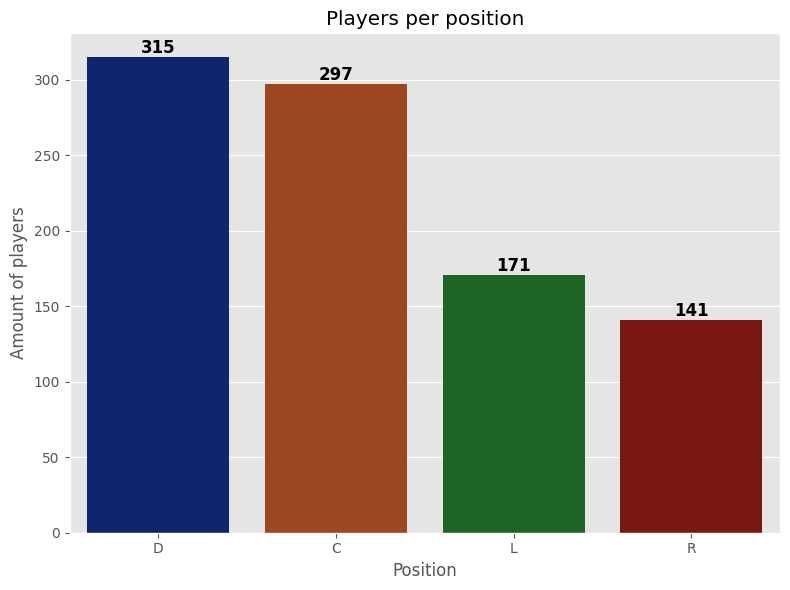

In [32]:
#plot size and type
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='position', data=df_all, palette='dark')

# Add title and labels
plt.title('Players per position')
plt.xlabel('Position')
plt.ylabel('Amount of players')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Get the height (count) of each bar
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position label at the center-top of the bar
        ha='center', va='bottom', color='black', fontsize=12, fontweight='bold'
    )

# Adjust layout
plt.tight_layout()

# Show the plot

plt.show()

Not suprisingly the position with most players is defender 315 players, closely followed by center with 297. Left and right wingers hold the bottom with 171 and 141 players respectively. Dividing each of these numbers with 32(amount of teams) gives us how many players on each position each team uses throughout the season. D: 315/32=9.84, C: 297/32=9.28, L: 171/32=5.34 and R: 141/32=4.40. 

This plot tells us interesting story. Defenders being on top is not suprising but centers being so close behind definitely is. This could be explained for various reasons from how players position is determined officially to injuries being more frequent on this particular season. Same reasons would apply to difference between wingers. Season 2023-2024 had 30 more left wingers than right wingers which is quite a big gap and there are really no easy answer to why this is the case.

My main takeaway from this plot is that NHL season is a long one and you need lots of extra players each season ready to jump in. Especially stocking up on quality centers is never a bad idea. As mentioned before, average lineup has 4 centers per game and if each team on average uses 9.28 centers per season, teams have to be ready to replace centers way more frequently than other positions.

Speaking of the long season in NHL, I have always been interested how many games players each season. NHL season is 82 games long and players miss games quite frequently. Lets take a top10 of most frequent games played values!


In [33]:
# Get the values
game_counts = df_all['games_played'].value_counts().sort_index()
print(game_counts.nlargest(10)) #top10 most frequent games played values

82    106
1      44
81     43
80     40
78     26
76     25
79     24
77     23
2      21
74     20
Name: games_played, dtype: int64


Suprisingly 82 games is by far margin the most frequent games_played value with 106 players achieving this milestone. behind that are closely 1, 81 and 80 games_played values with 40+ players in each achieving these numbers. After them counts drop to 20s. Main takeaway from this list is that players most frequently play either lots of games or very few games. All the games_played values on this top10 list are either 1,2 or 74+. Lets plot all the counts to see this.

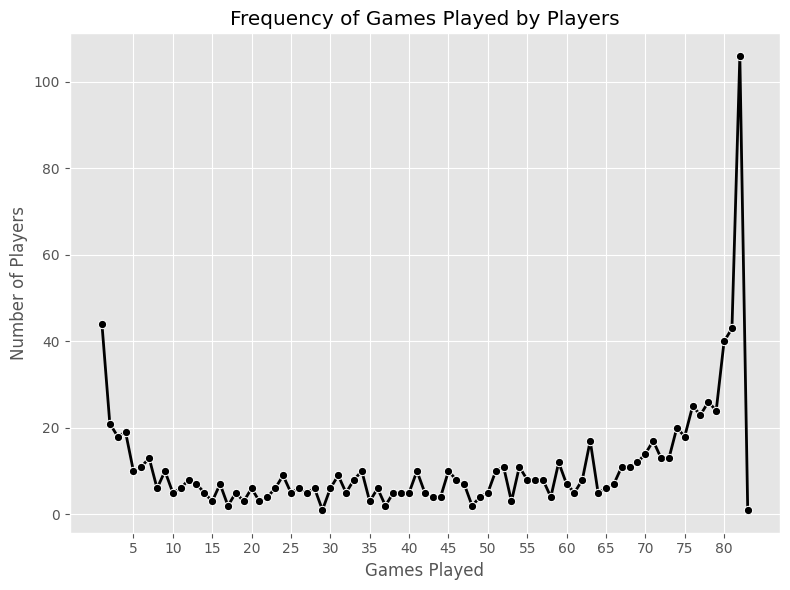

In [34]:
# Plot the frequency of games played
plt.figure(figsize=(8, 6))
sns.lineplot(x=game_counts.index, y=game_counts.values, color='black', marker='o', lw=2)

# Add titles and labels
plt.title('Frequency of Games Played by Players')
plt.xlabel('Games Played')
plt.ylabel('Number of Players')

ticks = game_counts.index  # All unique game played values
tick_interval = 5
# Display ticks for every 5th value
selected_ticks = ticks[4::tick_interval]
plt.xticks(selected_ticks)


plt.tight_layout()
plt.show()

The plot above tells the same story as the list did. Values get more frequent at each tail meaning players tend to play either many games or very few games. 

Now lets take a closer look on some of the individual performances. As always, everyone wants to know who were the biggest contributors and who scored the most points. Lets take a top10 again from the players with most points and see what proportion of goals, primary assists and secondary assist they are made of.

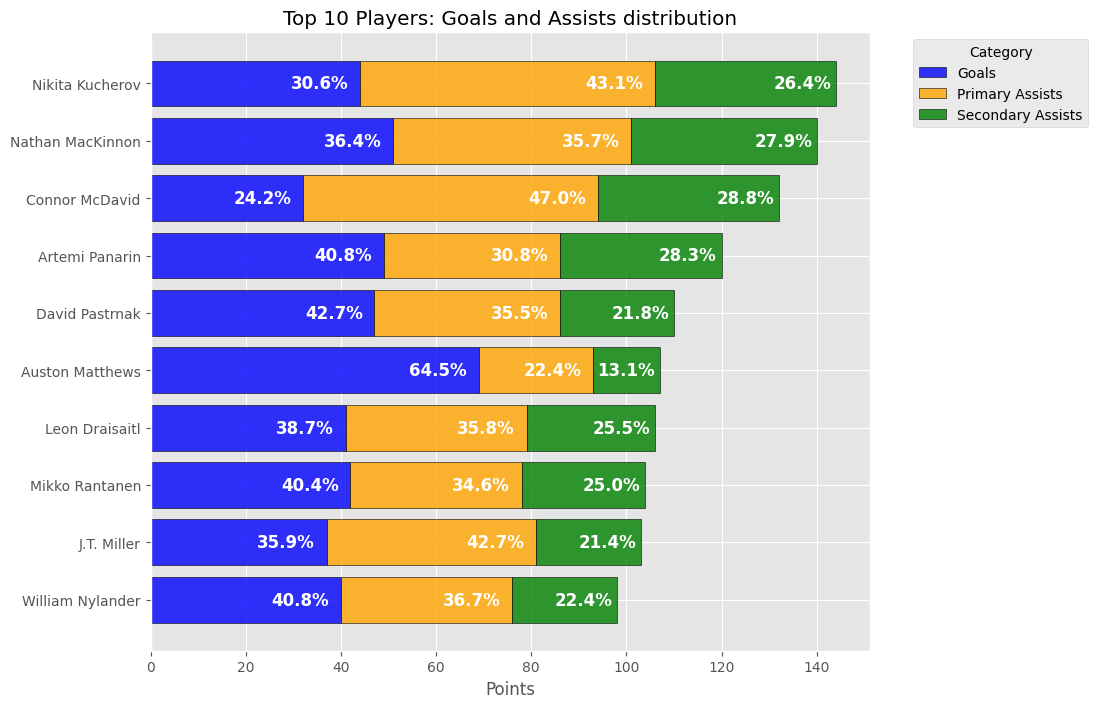

In [35]:
# Calculate total points
df_all['total'] = df_all['I_F_goals'] + df_all['I_F_primaryAssists'] + df_all['I_F_secondaryAssists']  # Total points

# Sort the DataFrame by total points in descending order and get the top 10 players
df_top10 = df_all.nlargest(10, 'total')
df_top10 = df_top10.sort_values(by='total', ascending=True)

# Plot using matplotlib with horizontal bars
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size

# Initialize the left values for stacking (set to zero initially)
left_values = [0] * len(df_top10)

# Plot Goals bars (stacked from the left)
bars_goals = ax.barh(df_top10['name'], df_top10['I_F_goals'], color='blue', edgecolor='black', label='Goals', alpha=0.8)

# Update left values to add the width of the goals bars
left_values = [df_top10['I_F_goals'].iloc[i] for i in range(len(df_top10))]

# Plot Primary Assists bars (stacked from the left)
bars_primary_assists = ax.barh(df_top10['name'], df_top10['I_F_primaryAssists'], left=left_values, color='orange', edgecolor='black', label='Primary Assists', alpha=0.8)

# Update left values to add the width of the primary assists bars
left_values = [left_values[i] + df_top10['I_F_primaryAssists'].iloc[i] for i in range(len(left_values))]

# Plot Secondary Assists bars (stacked from the left)
bars_secondary_assists = ax.barh(df_top10['name'], df_top10['I_F_secondaryAssists'], left=left_values, color='green', edgecolor='black', label='Secondary Assists', alpha=0.8)

# Percent of each way of scoring
percent_goals = (df_top10['I_F_goals'] / df_top10['total']) * 100
percent_primary_assists = (df_top10['I_F_primaryAssists'] / df_top10['total']) * 100
percent_secondary_assists = (df_top10['I_F_secondaryAssists'] / df_top10['total']) * 100

# Add percentages as labels using bar_label
ax.bar_label(
    bars_goals, 
    labels=[f'{x:.1f}%' for x in percent_goals], 
    color='white', 
    fontsize=12, 
    fontweight='bold', 
    padding=-50
)

ax.bar_label(
    bars_primary_assists, 
    labels=[f'{x:.1f}%' for x in percent_primary_assists], 
    color='white', 
    fontsize=12, 
    fontweight='bold', 
    padding=-50
)

ax.bar_label(
    bars_secondary_assists, 
    labels=[f'{x:.1f}%' for x in percent_secondary_assists], 
    color='white', 
    fontsize=12, 
    fontweight='bold', 
    padding=-45
)
# Add a title and legend
ax.set_title('Top 10 Players: Goals and Assists distribution')
ax.set_xlabel('Points')


# Adjust the legend to fit better
ax.legend(title='Category', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(pad=4.0)


plt.show()

The plot shows biggest superstars and how their points were made of. At first place we have Nikita kucherov with 144 points from which 30.6% were goals, 43.1% were primary assists and 26.4% were secondary assists.
 
This plot show interesting variation between top10 players. In goals percentage we have 2 outliers with Connor McDavid scoring only 24.2% of his points as goals and Auston Matthews scoring whopping 64.5% of points as goals. Rest of the players are pretty close 35-40% proportion in goals.

3 players scored over 42% of their points as primary assists with Connor McDavid leading the pack. Excluding the goalscoring machine Matthews rest of the players fell on to roughly 30-35% category here. on secondary assists variation is not so noticeable as most of the players are quite close to mid 20s with Matthews being the clear outlier again. 

Main takeaway from this plot is that there are not just one way to get lots of points. Auston Matthews showcased that focusing on goal scoring is just as viable strategy as anything else. That being said, most of the top10 scorers dont exceed 41% proportion and top3 names are all below 37%. Top scorers tend to make their points with roughly 38/62 goals/assist-split.

Now next thing I want to answers for is who was the most valuable player for their team. Now there are multiple ways to contribute value but I want to know who were the players involved in their team scoring, who had the highest points/teamgoals ratio. To do that, I need to create some new columns again.


In [36]:
team_goals = df_all.groupby('team')['I_F_goals'].sum()

# Map the team goals back df_all
df_all['goalsTeam'] = df_all['team'].map(team_goals)

# Calculate contribution percentage
df_all['contributionPercentage'] = (df_all['I_F_points'] / df_all['goalsTeam']) * 100

# Get the top 10 players based on contribution percentage
top_10_contributors = df_all[['name', 'contributionPercentage']].sort_values(by='contributionPercentage', ascending=False).head(10)

# Convert to list of tuples (name, contributionPercentage)
top_10_list = top_10_contributors.values.tolist()

# Print the result
print("Top 10 players by contribution percentage:")
for name, percentage in top_10_list:
    print(f"{name}: {percentage:.2f}%")

Top 10 players by contribution percentage:
Nikita Kucherov: 46.75%
Nathan MacKinnon: 43.21%
Kirill Kaprizov: 41.74%
David Pastrnak: 41.04%
Connor McDavid: 40.87%
Artemi Panarin: 40.82%
Mikael Granlund: 39.47%
Sidney Crosby: 38.06%
J.T. Miller: 37.05%
Robert Thomas: 36.75%


Interestingly enough this list brings us some variation vs the plot just above as well as some of the same names. The purpose of this list is to highlight players in lower-quality teams where only one or two players are contributing significantly to scoring. Nikita Kucherov still holds the top with Nathan Mackinnon trailing again but Kirill Kaprizov has made his way to fill the top3. Kaprizov was not involved in plot above and looking MVP-race this way does give us some new insights.

Next I want to look some names that were unlucky during the season. I will use xGoals metric to quantify how many goals player deserved and subtract the actual goals scored to get how many goals player scored below expected.

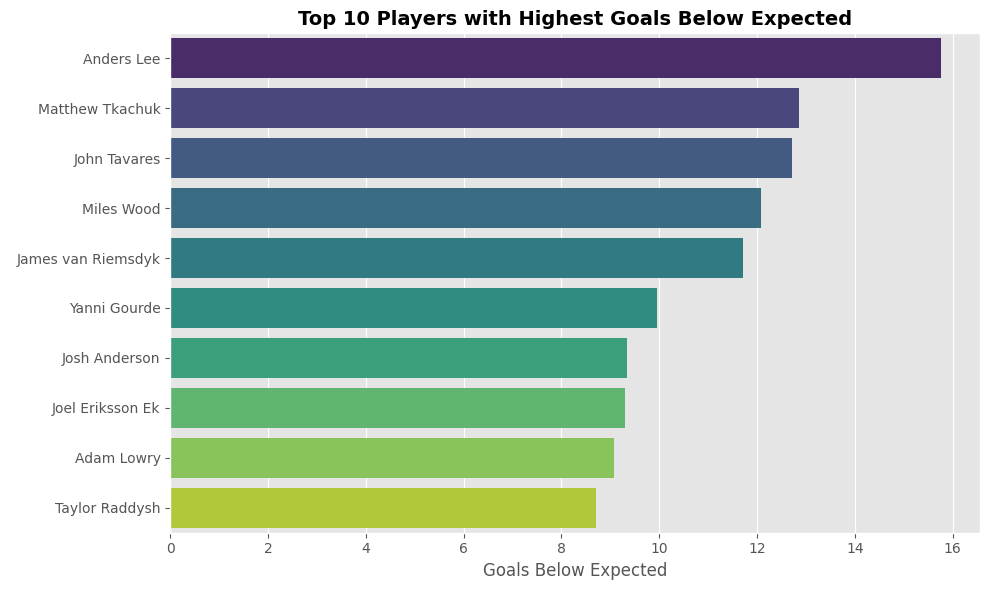

In [37]:
# Create the 'goalsBelowAverage' column
df_all['goalsBelowAverage'] = df_all['I_F_xGoals'] - df_all['I_F_goals']

# Get the top 10 players with the highest 'goalsBelowAverage'
df_top10_goals_below_avg = df_all.nlargest(10, 'goalsBelowAverage')[['name', 'goalsBelowAverage']]

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_goals_below_avg,
    x='goalsBelowAverage',
    y='name',
    palette='viridis'
)

# Add title and labels
plt.title('Top 10 Players with Highest Goals Below Expected', fontsize=14, fontweight='bold')
plt.xlabel('Goals Below Expected', fontsize=12)
plt.ylabel(' ', fontsize=1)

# Show the plot
plt.tight_layout()
plt.show()

This plot gives us interesting names for who didn't score quite how expected based on stats. We can also see lots of variation just on the top10 guys with Anders Lee scoring almost 16 goals below average and Taylor Raddysh as 10th guy on the list having value just above half of that. 

Now Im interested more abut these guys behind the stars. Those who contribute to the team effort but don't seem to get their name up on scoresheet. Luckily on the dataset we have column for goals scored while the player was on ice. Subtracting the actually scored points from this gives us the number for how many goals certain player was on ice for and didn't get point for.

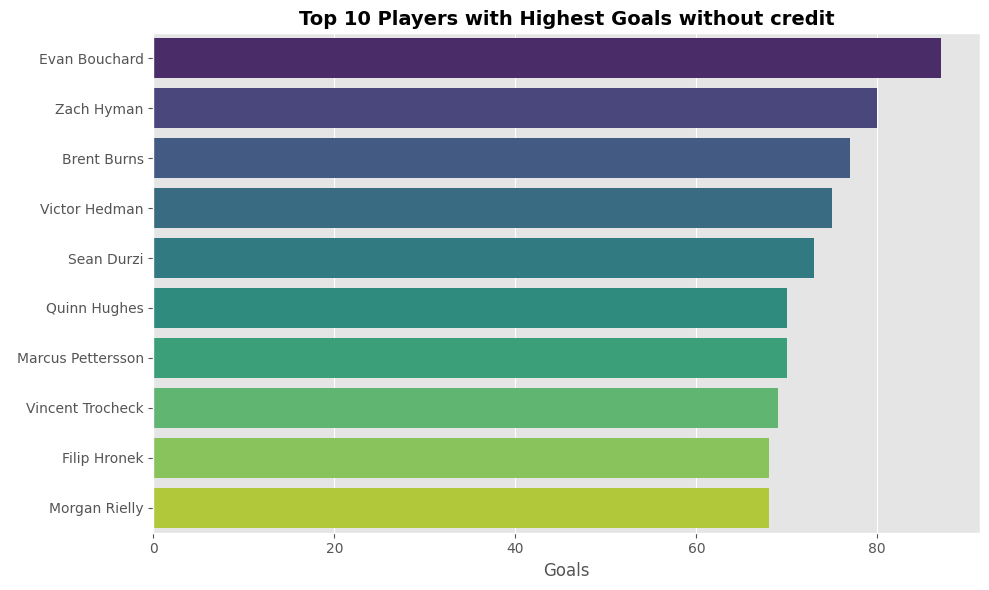

In [38]:
# Create the 'goalsWithoutCredit' column
df_all['goalsWithoutCredit'] = df_all['OnIce_F_goals'] - df_all['I_F_points']

# Get the top 10 players with the highest 'goalsBelowAverage'
df_top10_goals_below_avg = df_all.nlargest(10, 'goalsWithoutCredit')[['name', 'goalsWithoutCredit']]

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_goals_below_avg,
    x='goalsWithoutCredit',
    y='name',
    palette='viridis'
)

# Add title and labels
plt.title('Top 10 Players with Highest Goals without credit', fontsize=14, fontweight='bold')
plt.xlabel('Goals', fontsize=12)
plt.ylabel(' ', fontsize=1)

# Show the plot
plt.tight_layout()
plt.show()

These top10 lists are interesting and gives lots of ground to do further analysis and investigation. Sadly we can't go through everything on one notebook but this does give me a lots of ideas for further investigations.

Lastly on individual side I want to return list of players that can do "everything". Players that are above average in several categories. 

In [39]:
# Create column 'gameScorePerGames'
df_all['gameScorePerGames']=df_all['gameScore']/df_all['games_played']

# Define the columns to check for above-average values
columns_to_check = ['I_F_points', 'onIce_xGoalsPercentage', 'I_F_hits', 'gameScorePerGames',
                    'I_F_takeaways','shotsBlockedByPlayer']

averages = {column: df_all[column].mean() for column in columns_to_check}

# Filter for players who are above average in all columns
above_average_players = df_all[
    (df_all['I_F_points'] > averages['I_F_points']) &
    (df_all['onIce_xGoalsPercentage'] > averages['onIce_xGoalsPercentage']) &
    (df_all['I_F_hits'] > averages['I_F_hits']) &
    (df_all['gameScorePerGames'] > averages['gameScorePerGames'])&
    (df_all['I_F_takeaways'] > averages['I_F_takeaways'])&
    (df_all['shotsBlockedByPlayer'] > averages['shotsBlockedByPlayer'])
]

# Extract the names of the players who meet the condition
above_average_names = above_average_players['name'].tolist()

# Print the result
print("There are",len(above_average_names), "players above average in chosen categories")
print(above_average_names)

There are 54 players above average in chosen categories
['Vincent Trocheck', 'Evan Bouchard', 'Sam Reinhart', 'Trevor Moore', 'Jamie Benn', 'Phillip Danault', 'Eeli Tolvanen', 'Tyson Foerster', 'J.T. Miller', 'Charlie McAvoy', 'Ross Colton', 'Justin Faulk', 'Jakob Chychrun', 'Eetu Luostarinen', 'Juraj Slafkovsky', 'Tom Wilson', 'Sean Walker', 'Gustav Forsling', 'Morgan Geekie', 'John Carlson', 'Blake Coleman', 'Yanni Gourde', 'Joel Farabee', 'Erik Haula', 'Devon Toews', 'Drew Doughty', 'Brady Skjei', 'Victor Hedman', 'Filip Hronek', 'Elias Pettersson', 'Mattias Ekholm', 'Nick Suzuki', 'Aleksander Barkov', 'Morgan Rielly', 'Brayden Schenn', 'Auston Matthews', 'Seth Jarvis', 'Josh Morrissey', 'Anders Lee', 'Rasmus Dahlin', 'Ryan Hartman', 'Marcus Pettersson', 'Joel Eriksson Ek', 'Noah Dobson', 'Jake DeBrusk', 'Ondrej Palat', 'Thomas Harley', 'Dmitry Orlov', 'Alex Tuch', 'Owen Tippett', 'Boone Jenner', 'Joe Pavelski', 'Kris Letang', 'MacKenzie Weegar']


interesting list of names! Maybe in the future I can dive in to this aswell.

Next we will jump into team statistics and start with boring one, goals scored. This time instead I want to see which teams scored the lowest amount of goals.



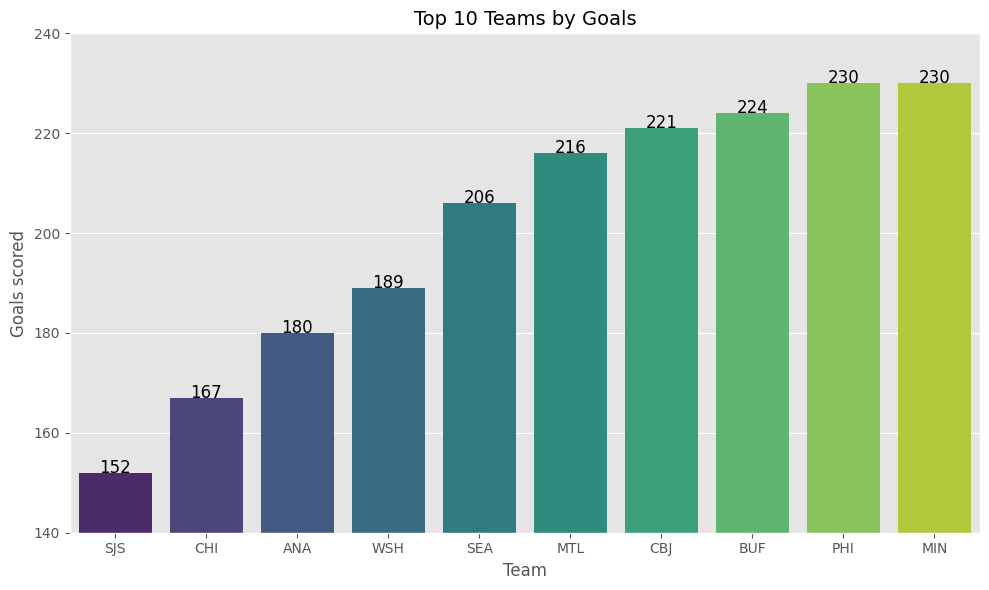

In [40]:

team_goals = df_all.groupby('team')['I_F_goals'].sum()

# Sort teams by  goals in ascending order
top10_teams = team_goals.sort_values(ascending=True).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_teams.index, y=top10_teams.values, palette='viridis')

# Add titles and labels
plt.title('Top 10 Teams by Goals', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Goals scored', fontsize=12)

# Add the exact values on top of the bars
for i, value in enumerate(top10_teams.values):
    plt.text(i, value + 0.05, f'{value:.0f}', ha='center', fontsize=12)
    
plt.ylim(140, 240)

plt.tight_layout()
plt.show()




These teams did NOT have a good season! The low end has a very big gap even to the top of bottom third teams with SJS scoring only 152 goals.

Next I want to take visual inspection on a myth I have encountered while consuming NHL information. The Myth goes like this: teams who draw lots of penalties also get lots of penalties themselves.

Now natural instinct goes against this. Surely the more skilled teams who dominate the puck possession draw so many more penalties than lower skilled teams? How could the other team even draw penalties if they are step behind all the time? The logic behind this is that referees in NHL are just humans. Referees don't want to decide the games so they have become game managers. If one team gets 5 penalties, referees might feel like they are obligated to give some easier penalties to other teams aswell just to give everyone fair chance. This does sound logical but what says data?



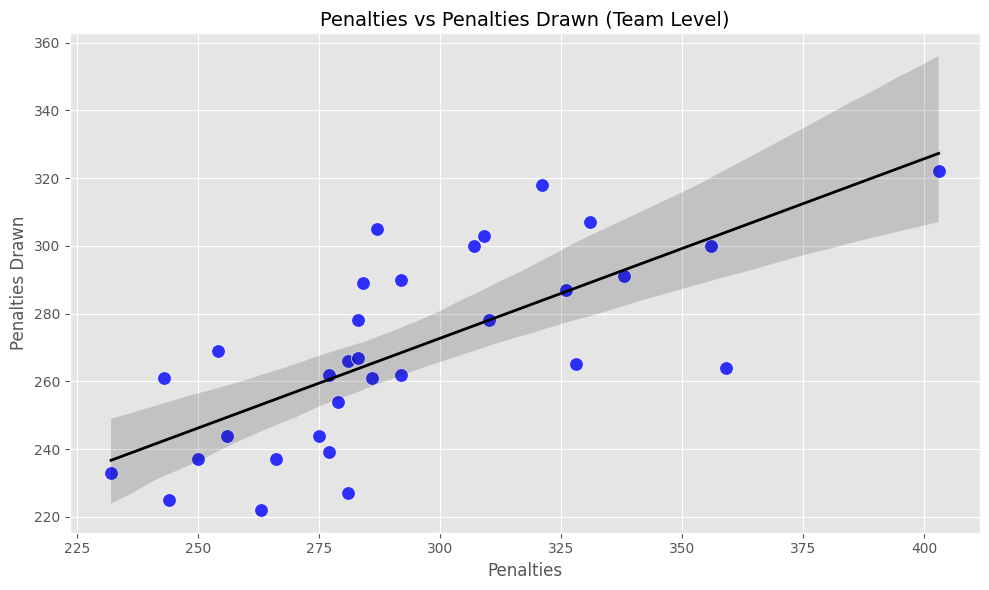

In [41]:
# Aggregate data at the team level
team_data = df_all.groupby('team')[['penalties', 'penaltiesDrawn']].sum().reset_index()

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_data, x='penalties', y='penaltiesDrawn', color='blue', s=100, alpha=0.8)
sns.regplot(data=team_data, x='penalties', y='penaltiesDrawn', scatter=False, color='black', line_kws={"linewidth": 2})

# Add labels and title
plt.title('Penalties vs Penalties Drawn (Team Level)', fontsize=14)
plt.xlabel('Penalties', fontsize=12)
plt.ylabel('Penalties Drawn', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

There seems to be something there. Data does suggest that there are correlation between these two metrics but there are not enough data to be definitive. Adding season or 2 more data to this could be great exploration path. 

Lastly I want to tip my toes in the mysterious world of xGoals. Expected goals is one of the most used advanced statistics form in all of sports. It is meant to show how many goals each player is expected to score based on all the chances they are getting based on data from previous years. Each chance is given probability to get a goal from. This probability is calculated with historic data, how often players scored from similar chance. 

xGoals is supposed to give a broad idea how many goals player should have scored. Ofc, with probabilities there is always the variance involved and xGoals and actual goals may not be close to eachother at all. In one of the earlier plots we investigated most unluckiest players in the league and saw that Anders Lee had over 16 goals differential between these two metrics. 

I want to plot these different xGoals measures to see how much the actual correlation is in just one season of data.

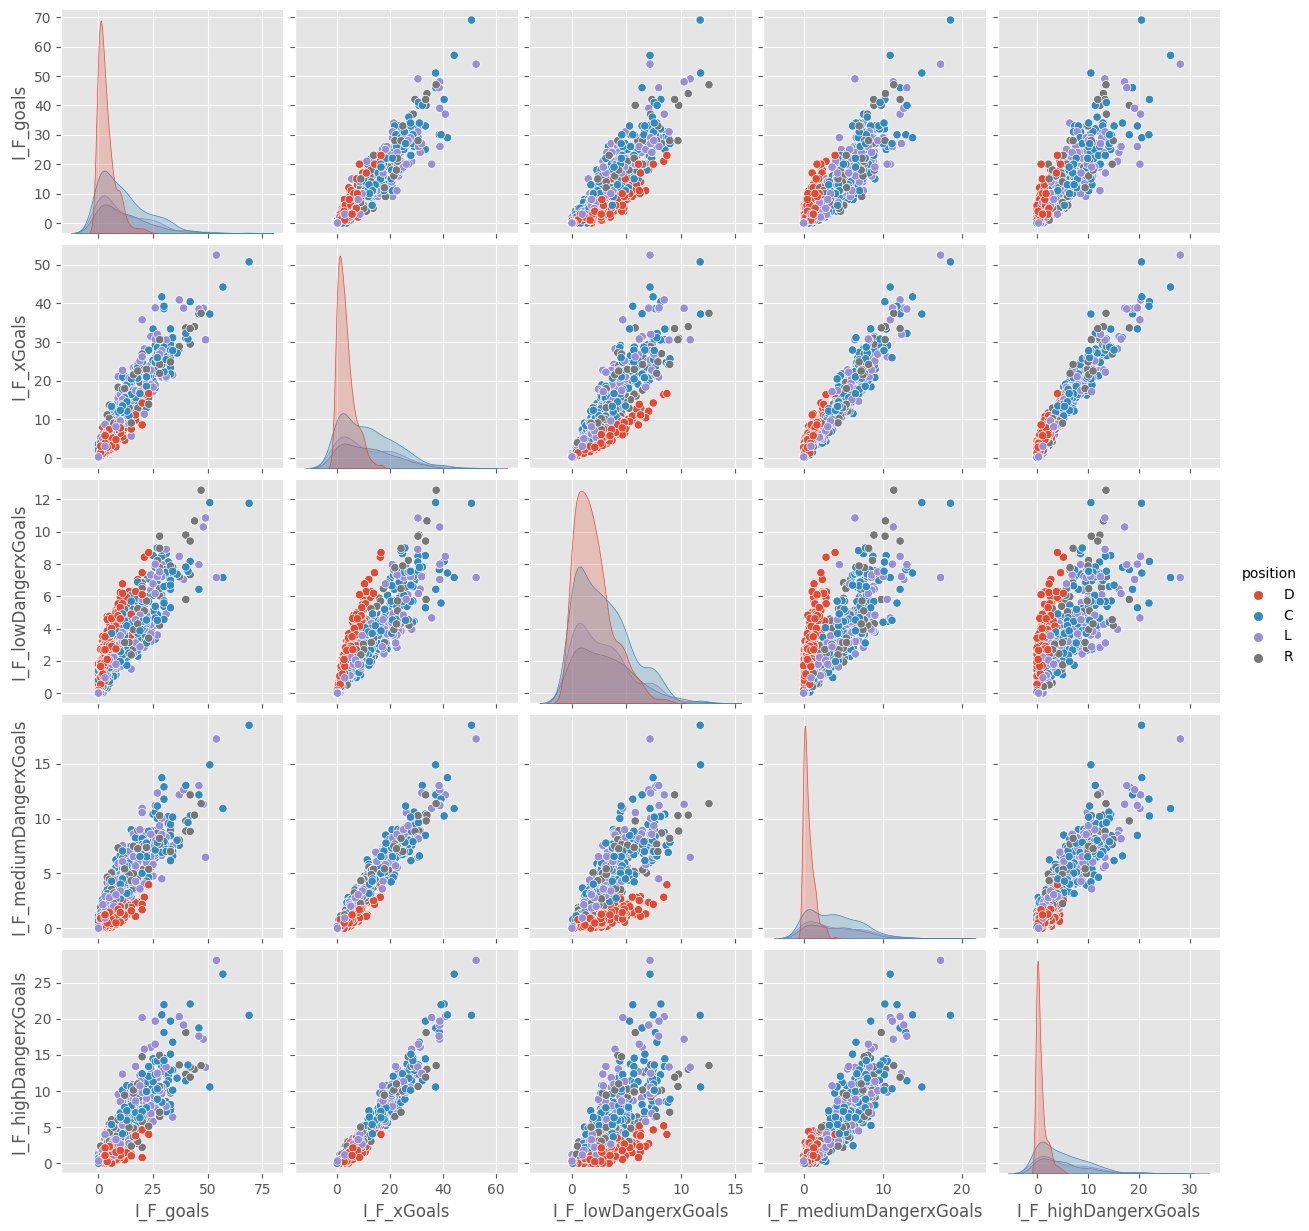

In [42]:
sns.pairplot(df_all,
             vars=['I_F_goals','I_F_xGoals','I_F_lowDangerxGoals', 'I_F_mediumDangerxGoals', 'I_F_highDangerxGoals'],
            hue='position')
plt.show()

Correlation are pretty clear here! Who would have thought that xGoals as advanced statistic metric is , well..... advanced?

Lets take a little more clearer idea for how much correlation we are talking about with heatmap!

<AxesSubplot: >

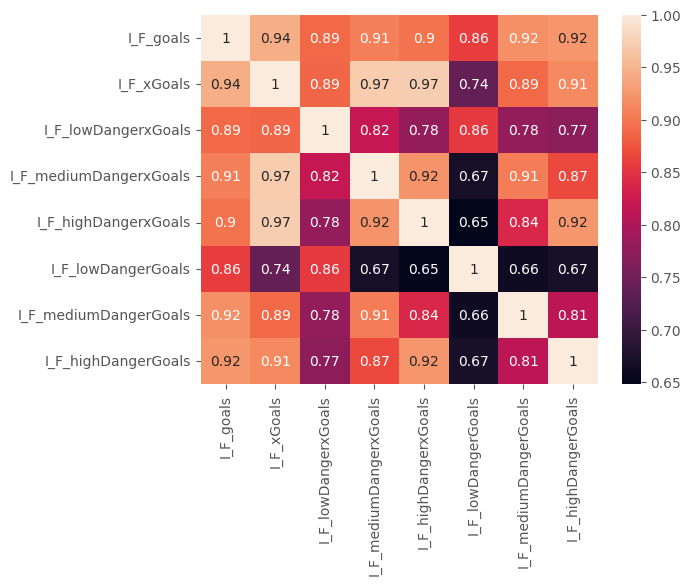

In [43]:
df_corr = df_all[['I_F_goals','I_F_xGoals','I_F_lowDangerxGoals', 'I_F_mediumDangerxGoals', 'I_F_highDangerxGoals',
                  'I_F_lowDangerGoals', 'I_F_mediumDangerGoals', 'I_F_highDangerGoals']].corr()


sns.heatmap(df_corr, annot=True)

Heatmap show interesting dynamics. First of all goals and xGoals have 0.94 correlation which is quite huge. All round the heatmap correlations are high with lowest being 0.65 between low danger goals and high danger xGoals. For future, creating these heatmaps with different metrics could show some interesting relationships. 

## The End

 In this notebook I explored some NHL data and make some interesting findings. I definitely want to go deeper on this dataset and bring on multiple seasons to get even more insights.
 
 For future challenge I need to figure out ways to deal with players with low amount of games and very small/zero values in certain metrics. I would also like to figure out ways to separate stats for players who got traded middle of the season. Also in this notebook I only got to look into overall statistics but I know that for example 5v4 stats could reveal something very interesting. There are somany avenues to pursue with this kind of data and I can't wait to continue!